# Prediction of index using ARIMA

This notebook shows how to use ARIMA to predict the index of a time series.

Author: Martin Erpicum


## Importing the libraries

In [76]:
!pip3 install statsmodels
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import datetime as dt

In [77]:

df = pd.read_csv('./index_df.csv', sep=';')

df['valid_since'] = pd.to_datetime(df['valid_since'], format='%d/%m/%Y')
df.index = df['valid_since']
df['index'] = df['index'].str.replace(',', '.').astype(float)
df.head()



,valid_since,index,rank
valid_since,,,
1990-01-01,1990-01-01,1.0000,0
1990-02-01,1990-02-01,1.0200,1
1990-10-01,1990-10-01,1.0404,2
1991-03-01,1991-03-01,1.0612,3
1991-12-01,1991-12-01,1.0824,4


In [78]:
arima_model = ARIMA(df['index'], order=(1, 1, 0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                   34
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 182.015
Date:                Mon, 10 Oct 2022   AIC                           -360.030
Time:                        15:19:55   BIC                           -357.037
Sample:                             0   HQIC                          -359.023
                                 - 34                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9942      0.003    351.171      0.000       0.989       1.000
sigma2      8.195e-07   2.17e-07      3.783      0.000    3.95e-07    1.24e-06
Ljung-Box (L1) (Q):                   7.08   Jarque-

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to 

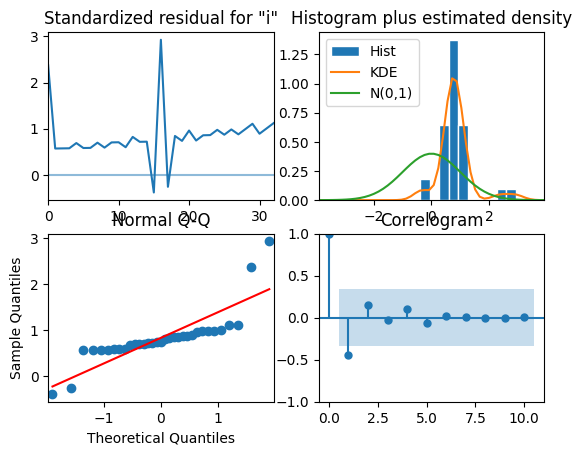

In [79]:
# plot arima model fit
arima_model_fit.plot_diagnostics()
plt.show()


In [80]:
fig = make_subplots()
fig.add_trace(px.line(df, x='valid_since', y='index', title='Indexation').data[0])
fig.add_trace(px.line(df, x='valid_since', y=arima_model_fit.fittedvalues, title='Indexation').data[0])

# change color of trace 
fig.data[1].line.color = 'red'
# add name 
fig.data[1].name = 'ARIMA model fit'
# dashed line
fig.data[1].line.dash = 'dash'

# add legend
fig.update_layout(showlegend=True)


fig.show()


In [81]:
# forecast for next 5 years every 6 months
forecast = arima_model_fit.get_forecast(steps=100)
forecast_df = forecast.summary_frame(alpha=0.05)
# add date to forecast
forecast_df.head()

# add 6 months to last date
last_date = df.index[-1] + dt.timedelta(days=180)

# change index to datetime for each month after last date
forecast_df.index = pd.date_range(start=last_date, periods=100, freq='6M')


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [82]:


# plot forecast
fig = make_subplots(rows=1, cols=1)
fig.add_trace(px.line(df, x='valid_since', y='index', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(df, x='valid_since', y=arima_model_fit.fittedvalues, title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean_ci_lower', title='Indexation').data[0], row=1, col=1)
fig.add_trace(px.line(forecast_df, x=forecast_df.index, y='mean_ci_upper', title='Indexation').data[0], row=1, col=1)

# change color of trace
# change color of trace 
fig.data[1].line.color = 'red'
# add name 
fig.data[1].name = 'ARIMA model fit'
# dashed line
fig.data[1].line.dash = 'dash'

# change color of trace
fig.data[2].line.color = 'green'
fig.data[3].line.color = 'grey'
fig.data[4].line.color = 'purple'

# add legend
fig.update_layout(showlegend=True, title='Indexation forecast')

fig.show()



In [83]:
# show data of prediction
forecast_df





index,mean,mean_se,mean_ci_lower,mean_ci_upper
2023-02-28,1.959682,0.000905,1.957907,1.961456
2023-08-31,1.996946,0.002019,1.992988,2.000904
2024-02-29,2.033995,0.003372,2.027386,2.040603
2024-08-31,2.070829,0.004925,2.061176,2.080481
2025-02-28,2.107449,0.006654,2.094408,2.120490
...,...,...,...,...
2070-08-31,4.688162,0.406934,3.890585,5.485739
2071-02-28,4.709620,0.412466,3.901201,5.518038
2071-08-31,4.730953,0.418007,3.911673,5.550232
2072-02-29,4.752162,0.423559,3.922002,5.582323


In [84]:
# add column to df
df['coefficient'] = 1

# drop rank
df = df.drop(columns=['rank'])
df = df.drop(columns=['valid_since'])

forecast_to_combine_df = forecast_df.copy()

# add coefficient to forecast based on the prediction of arima
forecast_to_combine_df['coefficient'] = forecast_to_combine_df['mean'] / forecast_to_combine_df['mean'].iloc[0]

forecast_to_combine_df['coefficient'] = round(1 / forecast_to_combine_df['coefficient'], 2)

forecast_to_combine_df['index'] = round(forecast_to_combine_df['mean'], 4)
forecast_to_combine_df = forecast_to_combine_df.drop(columns=['mean', 'mean_se', 'mean_ci_lower', 'mean_ci_upper'])

# combine data of prediction with original data
df = pd.concat([df, forecast_to_combine_df], axis=0)
df

# name to index
df.index.name = 'valid_since'

df.to_csv('./index_df_with_prediction.csv')
